In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
set_style("whitegrid")

/Users/ketansand/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [10]:
import prophet
from prophet import Prophet

In [21]:
file = '/Users/ketansand/Downloads/Flight_Data/2022/Atlanta.csv'
file_prev = '/Users/ketansand/Downloads/Flight_Data/2021/Atlanta.csv'

data_2022 = pd.read_csv(file)
data_2021 = pd.read_csv(file_prev)

#### only keeping days with delay ########

data_2022 = data_2022[data_2022['DEP_DELAY'] > 0]
data_2021 = data_2021[data_2021['DEP_DELAY'] > 0]

delay_time = data_2022['DEP_DELAY'].fillna(0)
data_2022['Date'] = pd.to_datetime(data_2022['FL_DATE'])

train_len = int(len(delay_time) * .7)
print(train_len)
delay_train = delay_time[:train_len].copy()
delay_test = delay_time[train_len:].copy()

83577


In [24]:
##### Putting it in format Prophet needs ########
delay_train_df = pd.DataFrame()
delay_train_df['ds'] = data_2022.Date[:train_len]
delay_train_df['y'] = delay_train
display(delay_train_df)

delay_test_df = pd.DataFrame()
delay_test_df['ds'] = data_2022.Date[train_len:]
delay_test_df['y'] = delay_test

display(delay_test_df)

,ds,y
1,2022-01-01,72.0
3,2022-01-01,95.0
9,2022-01-01,5.0
11,2022-01-01,1.0
16,2022-01-01,5.0
...,...,...
217040,2022-09-08,3.0
217042,2022-09-08,44.0
217061,2022-09-08,7.0
217063,2022-09-08,9.0


,ds,y
217069,2022-09-08,22.0
217072,2022-09-08,5.0
217073,2022-09-08,3.0
217075,2022-09-08,4.0
217079,2022-09-08,39.0
...,...,...
317913,2022-12-31,35.0
317915,2022-12-31,6.0
317917,2022-12-31,23.0
317920,2022-12-31,5.0


In [25]:
m = Prophet(daily_seasonality=True)

## Fitting the model, notice that we just input the df
## no .fit(X, y)
m.fit(delay_train_df)

20:00:45 - cmdstanpy - INFO - Chain [1] start processing
20:00:56 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
print(m.predict(delay_test_df[['ds']]))

              ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     2022-09-08  50.114696  -59.914971  105.422265    50.114696    50.114696   
1     2022-09-08  50.114696  -63.120603  106.221695    50.114696    50.114696   
2     2022-09-08  50.114696  -51.889072  112.830159    50.114696    50.114696   
3     2022-09-08  50.114696  -54.788168  107.465005    50.114696    50.114696   
4     2022-09-08  50.114696  -65.001991  106.478632    50.114696    50.114696   
...          ...        ...         ...         ...          ...          ...   
35814 2022-12-31  -6.162788 -384.922442  328.072385  -356.210879   351.317724   
35815 2022-12-31  -6.162788 -388.170196  331.279645  -356.233717   351.327419   
35816 2022-12-31  -6.162788 -390.703941  321.595571  -356.256555   351.337114   
35817 2022-12-31  -6.162788 -390.941270  339.258172  -356.279392   351.346808   
35818 2022-12-31  -6.162788 -386.812496  326.671134  -356.302230   351.356503   

       additive_terms  addi

In [19]:
print(delay_test_df)

               ds   y
217069 2022-09-08 NaN
217072 2022-09-08 NaN
217073 2022-09-08 NaN
217075 2022-09-08 NaN
217079 2022-09-08 NaN
...           ...  ..
317913 2022-12-31 NaN
317915 2022-12-31 NaN
317917 2022-12-31 NaN
317920 2022-12-31 NaN
317921 2022-12-31 NaN

[35819 rows x 2 columns]


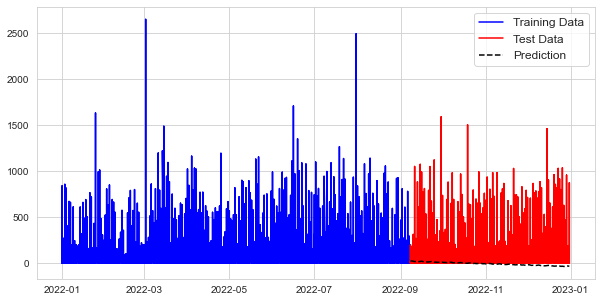

In [28]:
plt.figure(figsize=(10,5))

plt.plot(delay_train_df.ds,
         delay_train_df.y,
         'b-',
         label="Training Data")

# plt.plot(delay_train_df.ds,
#          m.predict().yhat,
#          'r--',
#          label="Prophet Prediction")

plt.plot(delay_test_df.ds,
         delay_test_df.y,
         'r-',
         label="Test Data")

plt.plot(delay_test_df.ds,
         m.predict(delay_test_df[['ds']]).yhat,
         'k--',
         label='Prediction')



plt.legend(fontsize=12)

plt.show()